In [ ]:
#Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
from datetime import datetime
from sklearn.impute import SimpleImputer
from hyperopt import tpe,hp,Trials
from hyperopt.fmin import fmin
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install hpsklearn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.1 MB/s eta 0:00:00
  Created wheel for hpsklearn: filename=hpsklearn-0.1.0-py3-none-any.whl size=23911 sha256=6e1bda80f049a225c69f998cfc95cb116e453cf6b8f10d55f764327bc6297257
  Stored in directory: /root/.cache/pip/wheels/17/c9/77/c90583ead12766888d5bd1287f1a459a96c0de450ded17f6d5
Successfully built hpsklearn


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/checkpoint_2.csv')
validation_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/validation_imputed.csv', low_memory=False)
test_data  = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/test_checkpoint.csv', low_memory=False)

In [ ]:
def convert_columns_to_object(df):
    # Convert all columns except 'Age' and 'Global_Score_Pro' to object type
    columns_to_convert = [col for col in df.columns if col not in ['Age', 'Global_Score_pro']]
    df[columns_to_convert] = df[columns_to_convert].astype('object')
    return df

# Assuming test_final and validation_data are your DataFrames
train_data = convert_columns_to_object(train_data)
test_data = convert_columns_to_object(test_data)
validation_data = convert_columns_to_object(validation_data)

Model saved to /content/drive/MyDrive/Colab Notebooks/model.pkl


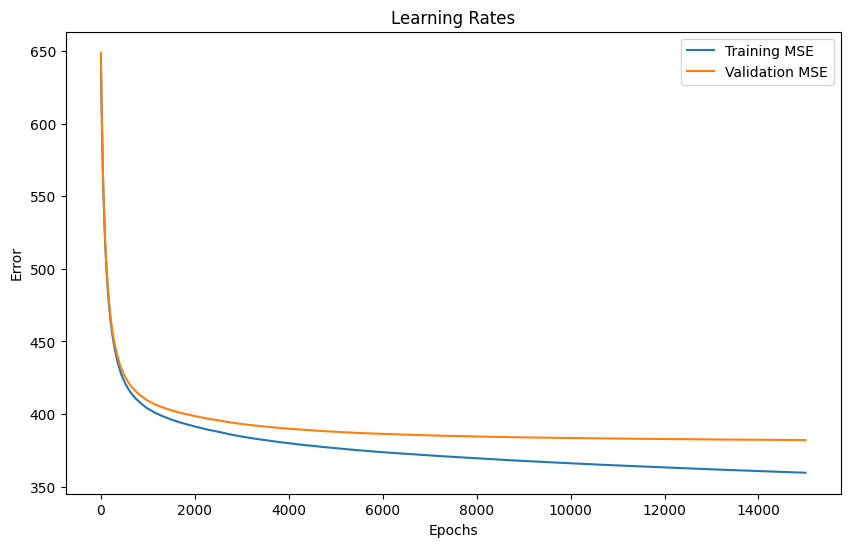

Mean Squared Error (MSE) on training set: 359.5536183211286
Mean Squared Error (MSE) on validation set: 382.0528769435066


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
import numpy as np
#Test model
# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Define features and target variable for training set
X_train = train_data.drop(columns=['ID', 'Global_Score_pro'])
y_train = train_data['Global_Score_pro']

# Define features and target variable for validation set
X_valid = validation_data.drop(columns=['ID', 'Global_Score_pro'])
y_valid = validation_data['Global_Score_pro']

# List of categorical columns (excluding 'Age' as it is not categorical)
categorical_columns = [col for col in X_train.columns if col != 'Age']

# Mark categorical columns as categorical data type
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')

# Define hyperparameters
hyperparameters = {
    'eta': 0.01,
    'gamma': 1,
    'max_depth': 3,
    'min_child_weight': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'n_estimators': 15000,
    'random_state': seed,  # Set the seed in hyperparameters
    'enable_categorical': True  # Enable native categorical support
}

# Initialize XGBoost regressor with provided hyperparameters
model = xgb.XGBRegressor(**hyperparameters)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=False)

# Save the model to a file in the specified Google Drive folder
model_filename = "/content/drive/MyDrive/Colab Notebooks/model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

# Get evaluation results
results = model.evals_result()

# Extract RMSE values
train_rmse = results['validation_0']['rmse']
valid_rmse = results['validation_1']['rmse']

# Extract MSE values
train_mse = [rmse ** 2 for rmse in train_rmse]
valid_mse = [rmse ** 2 for rmse in valid_rmse]

# Plot learning rates
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE')
plt.plot(valid_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Learning Rates')
plt.legend()
plt.show()

# Print MSE on training set
print("Mean Squared Error (MSE) on training set:", train_mse[-1])

# Print MSE on validation set
print("Mean Squared Error (MSE) on validation set:", valid_mse[-1])

Model saved to /content/drive/MyDrive/Colab Notebooks/model.pkl


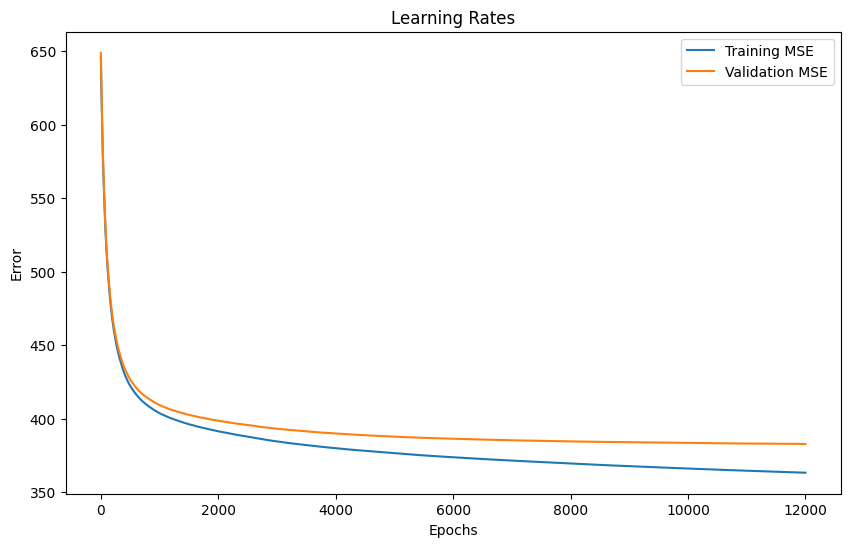

Mean Squared Error (MSE) on training set: 363.20573359742406
Mean Squared Error (MSE) on validation set: 382.77832744661623


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Define features and target variable for training set
X_train = train_data.drop(columns=['ID', 'Global_Score_pro'])
y_train = train_data['Global_Score_pro']

# Define features and target variable for validation set
X_valid = validation_data.drop(columns=['ID', 'Global_Score_pro'])
y_valid = validation_data['Global_Score_pro']

# List of categorical columns (excluding 'Age' as it is not categorical)
categorical_columns = [col for col in X_train.columns if col != 'Age']

# Mark categorical columns as categorical data type
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')

# Define hyperparameters
hyperparameters = {
    'eta': 0.01,
    'gamma': 1,
    'max_depth': 3,
    'min_child_weight': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'n_estimators': 12000,
    'random_state': seed,  # Set the seed in hyperparameters
    'enable_categorical': True  # Enable native categorical support
}

# Initialize XGBoost regressor with provided hyperparameters
model = xgb.XGBRegressor(**hyperparameters)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=False)

# Save the model to a file in the specified Google Drive folder
model_filename = "/content/drive/MyDrive/Colab Notebooks/model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

# Get evaluation results
results = model.evals_result()

# Extract RMSE values
train_rmse = results['validation_0']['rmse']
valid_rmse = results['validation_1']['rmse']

# Extract MSE values
train_mse = [rmse ** 2 for rmse in train_rmse]
valid_mse = [rmse ** 2 for rmse in valid_rmse]

# Plot learning rates
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE')
plt.plot(valid_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Learning Rates')
plt.legend()
plt.show()

# Print MSE on training set
print("Mean Squared Error (MSE) on training set:", train_mse[-1])

# Print MSE on validation set
print("Mean Squared Error (MSE) on validation set:", valid_mse[-1])


In [ ]:
# Define features for test set
X_test = test_data.drop(columns=['ID', 'Global_Score_pro'])

# Convert categorical columns to 'category' data type
for col in categorical_columns:
    X_test[col] = X_test[col].astype('category')

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['Global_Score_pro'], predictions)

# Print MSE
print("Mean Squared Error (MSE) on the test set:", mse)

Mean Squared Error (MSE) on the test set: 391.5046760759519


In [ ]:
# Noise Injection
noise_factor = 0.1

# Create a copy of X_test without categorical columns
X_test_noisy = X_test.copy()
X_test_noisy.loc[:, X_test_noisy.columns.difference(categorical_columns)] += noise_factor * np.random.normal(size=(len(X_test_noisy), len(X_test_noisy.columns.difference(categorical_columns))))

# Predict on noisy test set
y_test_pred_noisy = model.predict(X_test_noisy)

# Calculate Mean Squared Error (MSE) on noisy test set
mse_test_noisy = mean_squared_error(y_test, y_test_pred_noisy)
print("Mean Squared Error (MSE) on noisy test set:", mse_test_noisy)

Mean Squared Error (MSE) on noisy test set: 396.83491436285266


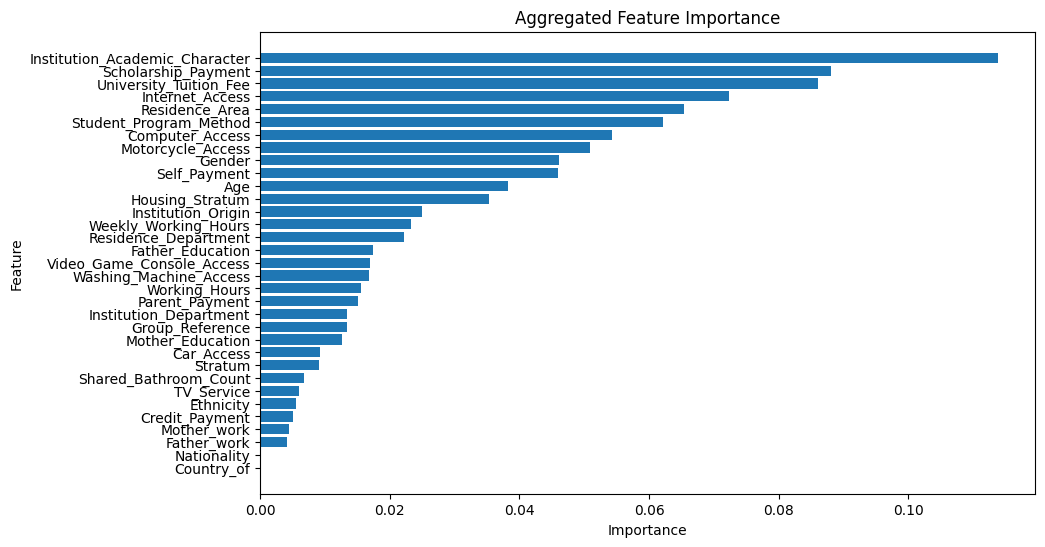

In [ ]:
# Extract feature importance
feature_importance_oh = model.feature_importances_

# Get the names of features
feature_names = X_train.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_oh})

# Modify the feature names to remove the prefix 'one_hot_encoder__' if present
feature_importance_df['Feature'] = feature_importance_df['Feature'].apply(lambda x: x.replace('one_hot_encoder__', '').rsplit('_', 1)[0])

# Aggregate feature importance
aggregated_importance = feature_importance_df.groupby('Feature').sum()

# Sort aggregated feature importance
aggregated_importance = aggregated_importance.sort_values(by='Importance', ascending=True)

# Plot aggregated feature importance
plt.figure(figsize=(10, 6))
plt.barh(aggregated_importance.index, aggregated_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Aggregated Feature Importance')
plt.show()

In [ ]:
pip install dalex -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042471 sha256=e0e246757d2d14ce42a7ecd9d9cc81fb77242cc28123fd0e5604a8c1fbce27ed
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex


In [ ]:
import dalex as dx
print(dx.__version__)

1.7.0


In [ ]:
# Create the dalex explainer for the model
exp = dx.Explainer(model, X_test, y_test, verbose=False)

# Print the explainer to check it's working
print(exp)

In [ ]:
mp = exp.model_performance()
print(mp.result)

                     mse       rmse        r2        mae        mad
XGBRegressor  391.504676  19.786477  0.399385  15.248455  12.397034


In [ ]:
X_test ['Gender'].head()

0    M
1    M
2    F
3    F
4    F
Name: Gender, dtype: category
Categories (2, object): ['F', 'M']

In [ ]:
protected_gender = np.where(X_test['Gender'] == 'F', 'Female', 'Male')
privileged_gender = 'Male'  # Privileged group is everything not in the protected group

fobject1 = exp.model_fairness(protected_gender , privileged_gender)
fobject1.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'Male'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          independence  separation  sufficiency
subgroup                                       
Female        1.073687    1.049153     1.000284


In [ ]:
protected_ethnicity = np.where(X_test['Ethnicity'] == 'Ninguno', 'Ethnicity', 'Else')
privileged_ethncity = 'Else'  # Privileged group is everything not in the protected group

fobject2 = exp.model_fairness(protected_ethnicity , privileged_ethncity)
fobject2.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'Else'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
           independence  separation  sufficiency
subgroup                                        
Ethnicity      1.014219    0.996686      0.99953


In [ ]:
protected_ethnicity = np.where(X_test['Residence_Area_pro'] == 'Area Rural', 'Rural', 'Urban')
privileged_ethncity = 'Urban'  # Privileged group is everything not in the protected group

fobject3 = exp.model_fairness(protected_ethnicity , privileged_ethncity)
fobject3.fairness_check()

Bias detected in 2 metrics: independence, separation

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Urban'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          independence  separation  sufficiency
subgroup                                       
Rural          1.79785    1.449346     1.000085


In [ ]:
fobject1.plot()

In [ ]:
fobject2.plot()

In [ ]:
fobject3.plot()

In [ ]:
training_set = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/training_OH.csv', low_memory=False) # I have to change the datasets for those whithout encoding!!!!

In [ ]:
validation_set = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/validation_OH.csv', low_memory=False)

In [ ]:
test_set = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/test_OH.csv', low_memory=False)

Model saved to /content/drive/MyDrive/Colab Notebooks/model_oh.pkl


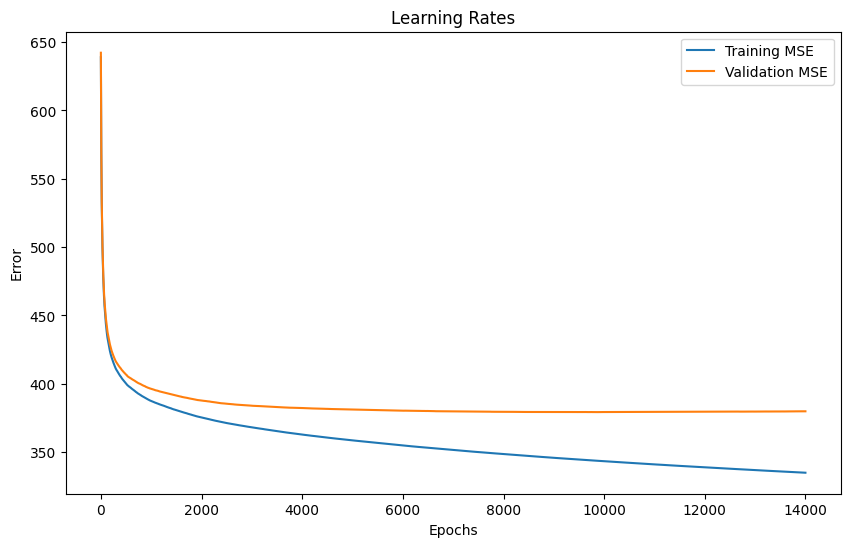

Mean Squared Error (MSE) on training set: 334.84330954125255
Mean Squared Error (MSE) on validation set: 379.8054149222294


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Define features and target variable for training set
X_train = training_set.drop(columns=['ID', 'Global_Score_pro'])
y_train = training_set['Global_Score_pro']

# Define features and target variable for validation set
X_valid = validation_set.drop(columns=['ID', 'Global_Score_pro'])
y_valid = validation_set['Global_Score_pro']

# Define hyperparameters
hyperparameters = {
    'eta': 0.05,
    'gamma': 1,
    'max_depth': 3,
    'min_child_weight': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'n_estimators': 14000,
    'random_state': seed  # Set the seed in hyperparameters
}

# Initialize XGBoost regressor with provided hyperparameters
model_oh = xgb.XGBRegressor(**hyperparameters)

# Train the model
model_oh.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=False)

# Save the model to a file in the specified Google Drive folder
model_filename = "/content/drive/MyDrive/Colab Notebooks/model_oh.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

# Get evaluation results
results = model_oh.evals_result()

# Extract RMSE values
train_rmse = results['validation_0']['rmse']
valid_rmse = results['validation_1']['rmse']

# Extract MSE values
train_mse = [rmse ** 2 for rmse in train_rmse]
valid_mse = [rmse ** 2 for rmse in valid_rmse]

# Plot learning rates
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE')
plt.plot(valid_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Learning Rates')
plt.legend()
plt.show()

# Print MSE on training set
print("Mean Squared Error (MSE) on training set:", train_mse[-1])

# Print MSE on validation set
print("Mean Squared Error (MSE) on validation set:", valid_mse[-1])


In [ ]:
# Define features for test set
X_test = test_set.drop(columns=['ID', 'Global_Score_pro'])

# Make predictions on test set
y_pred_test = model_oh.predict(X_test)

# Obtain true target values for the test set (assuming the target column is 'Global_Score_pro')
y_test = test_set['Global_Score_pro']

# Calculate Mean Squared Error (MSE) on test set
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) on test set:", mse_test)


Mean Squared Error (MSE) on test set: 379.31330249520937


In [ ]:
noise_factor = 0.1
X_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)

# Predict on noisy test set
y_test_pred_noisy = model_oh.predict(X_test_noisy)

# Calculate Mean Squared Error (MSE) on noisy test set
mse_test_noisy = mean_squared_error(y_test, y_test_pred_noisy)
print("Mean Squared Error (MSE) on noisy test set:", mse_test_noisy)

Mean Squared Error (MSE) on noisy test set: 729.5680425129692


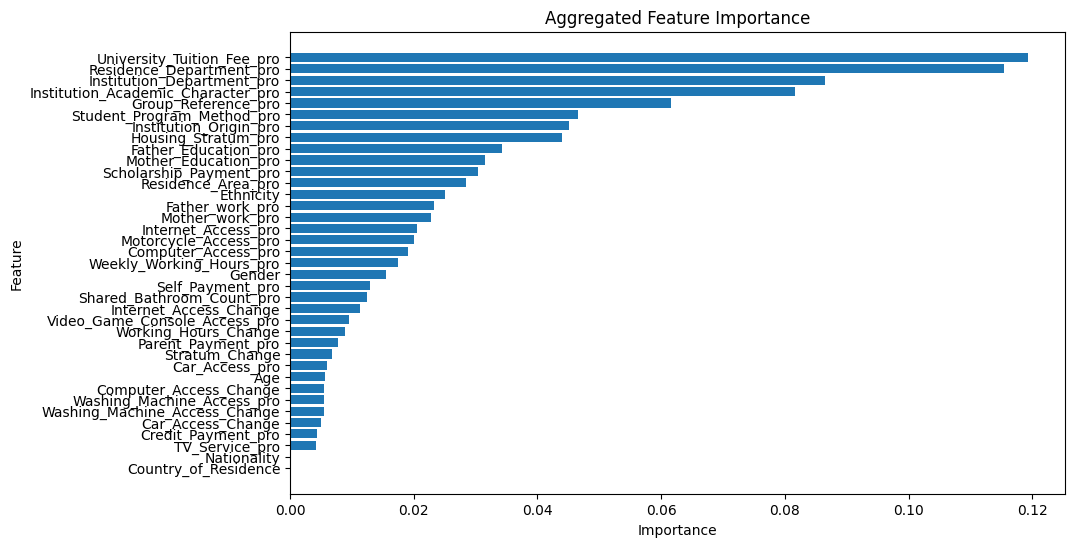

In [ ]:
# Extract feature importance
feature_importance_oh = model_oh.feature_importances_

# Get the names of features
feature_names = X_train.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_oh})

# Modify the feature names to remove the prefix 'one_hot_encoder__' if present
feature_importance_df['Feature'] = feature_importance_df['Feature'].apply(lambda x: x.replace('one_hot_encoder__', '').rsplit('_', 1)[0])

# Aggregate feature importance
aggregated_importance = feature_importance_df.groupby('Feature').sum()

# Sort aggregated feature importance
aggregated_importance = aggregated_importance.sort_values(by='Importance', ascending=True)

# Plot aggregated feature importance
plt.figure(figsize=(10, 6))
plt.barh(aggregated_importance.index, aggregated_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Aggregated Feature Importance')
plt.show()

In [ ]:
import xgboost as xgb
from hyperopt import hp, fmin, tpe, Trials
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Define features and target variable for training set
X_train = training_set.drop(columns=['ID', 'Global_Score_pro'])
y_train = training_set['Global_Score_pro']

# Define features and target variable for validation set
X_valid = validation_set.drop(columns=['ID', 'Global_Score_pro'])
y_valid = validation_set['Global_Score_pro']

seed = 42
max_evals = 50

def objective2(params):
    early_stopping_rounds = 50  # Fixed value
    n_estimators = 2000  # Fixed value

    md = int(params['max_depth'])
    learning = params['learning_rate']
    subsample = params['subsample']
    colsample_bytree = params['colsample_bytree']
    colsample_bylevel = params['colsample_bylevel']
    gamma = params['gamma']
    reg_lambda = params['reg_lambda']
    reg_alpha = params['reg_alpha']

    model = xgb.XGBRegressor(
        booster="gbtree",  # Fixed value
        n_estimators=n_estimators,
        max_depth=md,
        learning_rate=learning,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        gamma=gamma,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        early_stopping_rounds=50,
        random_state=seed
    )
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
    pred = model.predict(X_valid)
    score = mean_squared_error(y_valid, pred)
    return score

def optimize2(trial):
    params = {
        'max_depth': hp.uniform('max_depth', 3, 10),
        'min_child_weight': hp.loguniform('min_child_weight', np.log(1e-8), np.log(1e5)),
        'learning_rate': hp.loguniform('learning_rate', np.log(1e-5), np.log(1)),
        'subsample': hp.uniform('subsample', 0.5, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
        'colsample_bylevel': hp.uniform('colsample_bylevel', 0.5, 1),
        'gamma': hp.choice('gamma', [0, hp.loguniform('gamma_positive', np.log(1e-8), np.log(1e2))]),
        'reg_lambda': hp.choice('reg_lambda', [0, hp.loguniform('reg_lambda_positive', np.log(1e-8), np.log(1e2))]),
        'reg_alpha': hp.choice('reg_alpha', [0, hp.loguniform('reg_alpha_positive', np.log(1e-8), np.log(1e2))])
    }
    best2 = fmin(fn=objective2, space=params, algo=tpe.suggest, trials=trial, max_evals=max_evals, rstate=np.random.default_rng(seed),catch_eval_exceptions=True)
    return best2

trial2 = Trials()
best2 = optimize2(trial2)




100%|██████████| 50/50 [5:29:21<00:00, 395.24s/trial, best loss: 371.9470830944631]


In [ ]:
print (best2)

{'colsample_bylevel': 0.7011025998668419, 'colsample_bytree': 0.935599081892404, 'gamma': 0, 'learning_rate': 0.025783637362652087, 'max_depth': 9.459023493789264, 'min_child_weight': 1.5563942292151416, 'reg_alpha': 1, 'reg_alpha_positive': 0.0011680150513044094, 'reg_lambda': 1, 'reg_lambda_positive': 14.108250357124927, 'subsample': 0.7270888536027807}


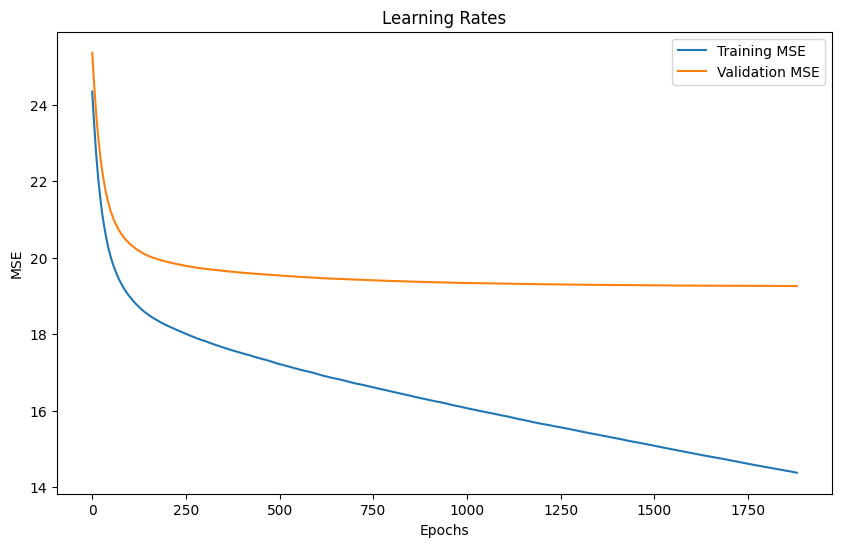

In [ ]:
# Plot learning rates
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training MSE')
plt.plot(valid_rmse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning Rates')
plt.legend()
plt.show()


In [ ]:
pip install dalex -U

In [ ]:
import dalex as dx
print(dx.__version__)

1.7.0


In [ ]:
# Define features for test set
X_test = test_data.drop(columns=['ID', 'Global_Score_pro'])

# Obtain true target values for the test set
y_test = test_data['Global_Score_pro']

In [ ]:
# Create the dalex explainer for the model
exp = dx.Explainer(model_oh, X_test, y_test, verbose=False)

# Print the explainer to check it's working
print(exp)

In [ ]:
mp = exp.model_performance()
print(mp.result)

                     mse       rmse        r2        mae        mad
XGBRegressor  379.313302  19.475967  0.418088  15.026814  12.215347


In [ ]:
protected_gender = np.where(X_test['one_hot_encoder__Gender_F'] == 1, 'Female', 'Male')
privileged_gender = 'Male'  # Privileged group is everything not in the protected group

fobject1 = exp.model_fairness(protected_gender , privileged_gender)
fobject1.fairness_check()


No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'Male'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          independence  separation  sufficiency
subgroup                                       
Female        1.063603    1.038904     1.000051


In [ ]:
protected_ethnicity = np.where(X_test['one_hot_encoder__Ethnicity_Ninguno'] == 0, 'Ethnicity', 'Else')
privileged_ethncity = 'Else'  # Privileged group is everything not in the protected group

fobject2 = exp.model_fairness(protected_ethnicity , privileged_ethncity)
fobject2.fairness_check()

Bias detected in 1 metrics: independence

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Else'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
           independence  separation  sufficiency
subgroup                                        
Ethnicity      1.490067    1.236713     1.004156


In [ ]:
fobject2.plot()

In [ ]:
protected_area = np.where(X_test['one_hot_encoder__Residence_Area_pro_Area Rural'] == 1, 'Rural', 'Urban')
privileged_area = 'Urban'  # Privileged group is everything not in the protected group

fobject3 = exp.model_fairness(protected_area , privileged_area)
fobject3.fairness_check()


Bias detected in 2 metrics: independence, separation

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Urban'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          independence  separation  sufficiency
subgroup                                       
Rural         1.723198    1.387745     1.000318


In [ ]:
fobject3.plot()